<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 5. Продвинутые методы классификации и регрессии

## Практика. Градиентный бустинг с набором данных "Титаник". Решение

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%pylab inline
import sys
sys.path.append('../../scripts/')
from load_titanic_with_features import load_titanic

Populating the interactive namespace from numpy and matplotlib


Загружаем данные.

In [2]:
train, y, test = map(np.array, 
                     load_titanic("../../data/titanic_train.csv",
                                   "../../data/titanic_test.csv"))

In [3]:
train[:5]

array([[3, 0, 22.0, 7.25, 0, 1, 1, -1],
       [1, 1, 38.0, 71.2833, 1, 1, 3, -1],
       [3, 1, 26.0, 7.925, 0, 0, 2, -1],
       [1, 1, 35.0, 53.1, 0, 1, 3, -1],
       [3, 0, 35.0, 8.05, 0, 0, 1, -1]], dtype=object)

Разбиваем выборку на обучающую и валидационную.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, y,
                                                    test_size=0.2,
                                                    random_state=1)

Пригодится сигмоида для преобразования ответов.

In [5]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

Создадим словарь, в котором будем хранить ошибки на обучающей и валидационной выборках (для каждого объекта) в зависимости от параметра градиентного бустинга learning_rate.

In [6]:
losses_by_lrate = {} # l_rate: [train_losses, test_losses]

При работе с градиентным бустингом удобно отслеживать ошибки на обучающей и валидационной выборках в зависимости от номера итерации бустинга. Для этого подходит метод staged_decision_function класса GradientBoostingClassifier. Метод возвращает ответы, которые еще надо превратить в прогнозы с помощью сигмоиды.

**В цикле по набору значений параметра learning_rate обучайте градиентный бустинг с сотней итераций (n_estimators=100). Используйте параметр random_state=42. Посчитайте для каждой итерации ошибку logloss на обучающей и валидационной выборках. Предсказания алгоритма считайте как сигмоида от ответа (метод staged_decision_function). Таким образом, составьте словарь ошибок, где ключами будут значения параметра learning_rate, а значениями словаря будут списки ошибок.**

In [12]:
?clf.staged_decision_function

In [11]:
clf = GradientBoostingClassifier(n_estimators=100, 
                                     learning_rate=0.05,
                                     verbose=True, random_state=241)
clf.fit(X_train, y_train)
[err for err in clf.staged_decision_function(X_train)]

      Iter       Train Loss   Remaining Time 
         1           1.2776            0.14s
         2           1.2344            0.12s
         3           1.1956            0.11s
         4           1.1606            0.10s
         5           1.1288            0.10s
         6           1.0999            0.10s
         7           1.0734            0.10s
         8           1.0492            0.09s
         9           1.0270            0.10s
        10           1.0066            0.10s
        20           0.8691            0.10s
        30           0.8009            0.08s
        40           0.7554            0.07s
        50           0.7231            0.06s
        60           0.6993            0.05s
        70           0.6768            0.04s
        80           0.6554            0.02s
        90           0.6379            0.01s
       100           0.6244            0.00s


[array([[-0.56309041],
        [-0.37671448],
        [-0.37671448],
        [-0.56309041],
        [-0.55037845],
        [-0.37671448],
        [-0.56309041],
        [-0.56309041],
        [-0.37671448],
        [-0.56309041],
        [-0.37671448],
        [-0.50383109],
        [-0.50383109],
        [-0.45116357],
        [-0.45116357],
        [-0.45116357],
        [-0.37671448],
        [-0.56309041],
        [-0.37671448],
        [-0.56309041],
        [-0.50383109],
        [-0.56309041],
        [-0.37671448],
        [-0.56309041],
        [-0.56309041],
        [-0.50383109],
        [-0.37671448],
        [-0.37671448],
        [-0.56309041],
        [-0.50383109],
        [-0.55037845],
        [-0.37671448],
        [-0.55988291],
        [-0.56309041],
        [-0.56309041],
        [-0.55037845],
        [-0.55037845],
        [-0.56309041],
        [-0.37671448],
        [-0.37671448],
        [-0.50383109],
        [-0.50383109],
        [-0.56309041],
        [-0

In [7]:
%%time
for learning_rate in [0.01, 0.03, 0.05, 0.1,
                      0.2, 0.3, 0.5, 1]:
    clf = GradientBoostingClassifier(n_estimators=100, 
                                     learning_rate=learning_rate,
                                     verbose=False, random_state=241)
    clf.fit(X_train, y_train)
    train_losses = [log_loss(y_train, sigmoid(pred))
             for pred in clf.staged_decision_function(X_train)]
    test_losses = [log_loss(y_test, sigmoid(pred))
             for pred in clf.staged_decision_function(X_test)]
    losses_by_lrate[learning_rate] = [train_losses, test_losses]  

CPU times: user 1.92 s, sys: 3.82 ms, total: 1.92 s
Wall time: 1.92 s


Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.01.

In [8]:
def plot_valid_curves(losses_by_lrate, learn_rate):
    train_losses = losses_by_lrate[learn_rate][0] 
    test_losses = losses_by_lrate[learn_rate][1]
    plot(np.arange(1, len(train_losses) + 1), train_losses, color='green')
    plot(np.arange(1, len(test_losses) + 1), test_losses, color='red')

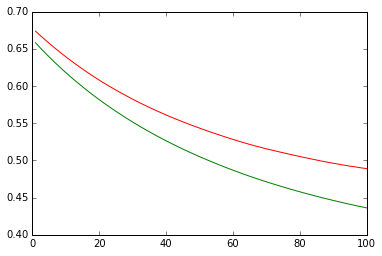

In [9]:
plot_valid_curves(losses_by_lrate, 0.01)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.03.

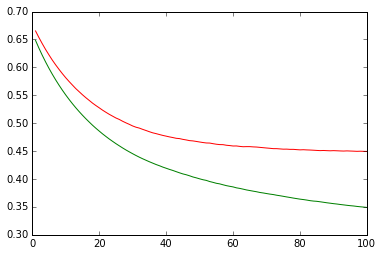

In [10]:
plot_valid_curves(losses_by_lrate, 0.03)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.05.

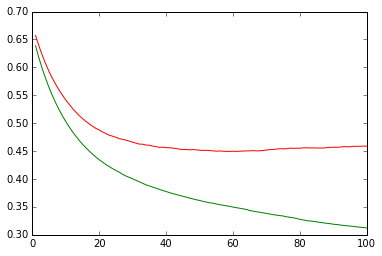

In [11]:
plot_valid_curves(losses_by_lrate, 0.05)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.1.

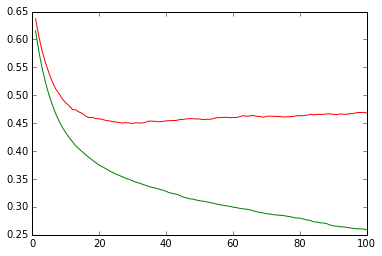

In [12]:
plot_valid_curves(losses_by_lrate, 0.1)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.2.

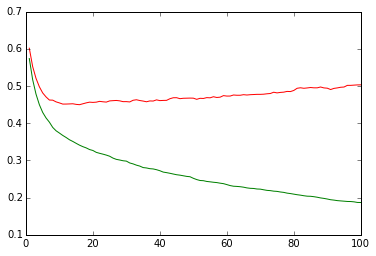

In [13]:
plot_valid_curves(losses_by_lrate, 0.2)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=0.3.

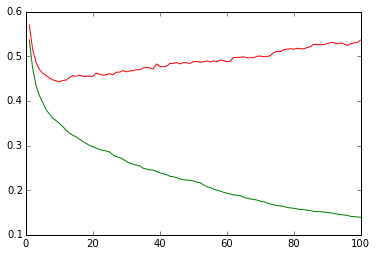

In [14]:
plot_valid_curves(losses_by_lrate, 0.3)

Нарисуем, как меняются ошибки на обучающей и валидационной выборках в зависимости от итерации обучения при learning_rate=1.

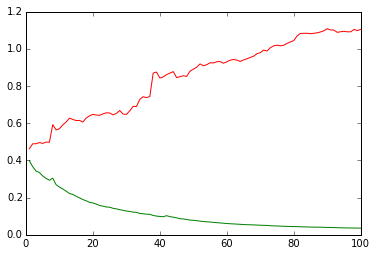

In [15]:
plot_valid_curves(losses_by_lrate, 1)

Построим валидационную кривую при фиксированном параметре скорости обучения learning_rate=0.05 и значениях числа итераций бустинга (n_estimators), меняющихся от 1 до 251 с шагом 5. Применим 3-кратную кроссвалидацию с параметром random_state=42.

In [16]:
%%time
clf = GradientBoostingClassifier(learning_rate=0.05,
                                     verbose=False, random_state=42)

n_estim = np.arange(1, 252, 5)

val_train, val_test = validation_curve(estimator=clf, X=X_train, 
                                       y=y_train,
                                       param_name='n_estimators', 
                                       param_range=n_estim, cv=3,
                                       scoring='log_loss')

CPU times: user 14.9 s, sys: 67.9 ms, total: 15 s
Wall time: 15.3 s


Отобразим валидационные кривые.

In [17]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

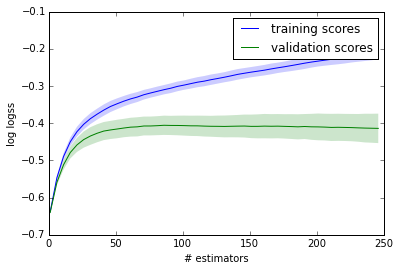

In [18]:
plot_with_err(n_estim, val_train, label='training scores')
plot_with_err(n_estim, val_test, label='validation scores')
plt.xlabel('# estimators'); plt.ylabel('log logss')
plt.legend();

Лучшая ошибка на валидационной выборке и соответствующее число итераций:

In [19]:
val_test_errors = val_test.mean(1)
max(val_test_errors), n_estim[np.argmax(val_test_errors)]

(-0.40558949893205343, 86)

**Постройте валидационные кривые при фиксированном параметре числа итераций бустинга n_estimators=86 и 30 значениях параметра скорости обучения (learning_rate) от 0.01 до 1. Примените 3-кратную кроссвалидацию с параметром random_state=42. Отслеживайте ошибку logloss. Это все делается с помощью метода sklearn.learning_curve.validation_curve.**

In [20]:
%%time
clf = GradientBoostingClassifier(n_estimators=86, 
                                     learning_rate=learning_rate,
                                     verbose=False, random_state=42)


learn_rates = np.linspace(0.01, 1, 30)
val_train, val_test = validation_curve(estimator=clf, X=X_train, 
                                       y=y_train,
                                       param_name='learning_rate', 
                                       param_range=learn_rates, cv=3,
                                       scoring='log_loss')

CPU times: user 6.15 s, sys: 16.8 ms, total: 6.17 s
Wall time: 6.21 s


**Отобразите валидационные кривые.**

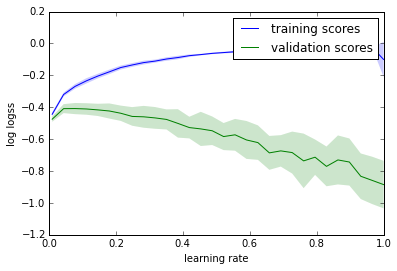

In [21]:
plot_with_err(learn_rates, val_train, label='training scores')
plot_with_err(learn_rates, val_test, label='validation scores')
plt.xlabel('learning rate'); plt.ylabel('log logss')
plt.legend()

**Определите лучшую ошибку на валидационной выборке и соответствующее значение параметра скорости обучения.**

In [22]:
val_test_errors = val_test.mean(1)
max(val_test_errors), learn_rates[np.argmax(val_test_errors)]

(-0.40819456800481002, 0.078275862068965515)

**Для определенного на предыдущем шаге параметра скорости обучения (округлите до 3 знаков) обучите градиентый бустинг с 200 итерациями и посмотрите, как будут меняться ошибки на обучающей и валидационной выборках (опять метод staged_decision_function, ошибки можно записать в созданный ранее словать losses_by_lrate). Используйте параметр random_state=42. **

In [23]:
opt_learning_rate = 0.078
clf = GradientBoostingClassifier(n_estimators=200, 
                                 learning_rate=opt_learning_rate,
                                 verbose=False, random_state=42)
clf.fit(X_train, y_train)
train_losses = [log_loss(y_train, sigmoid(pred))
             for pred in clf.staged_decision_function(X_train)]
test_losses = [log_loss(y_test, sigmoid(pred))
             for pred in clf.staged_decision_function(X_test)]
losses_by_lrate[opt_learning_rate] = [train_losses, test_losses]

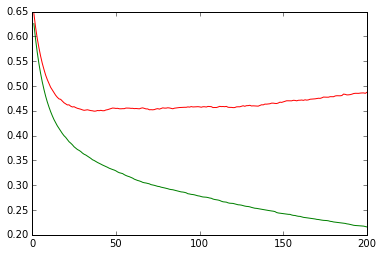

In [24]:
plot_valid_curves(losses_by_lrate, opt_learning_rate)

**Убедитесь в том, что при большом числе итераций и малом темпе обучения градиентный бустинг почти не переобучается. Для этого сделайте все то же, что и на прошлом шаге, но с параметрами learning_rate=0.001 и n_estimators=10000.**

In [25]:
%%time
small_learning_rate = 0.001
clf = GradientBoostingClassifier(n_estimators=10000, 
                                 learning_rate=small_learning_rate,
                                 verbose=False, random_state=42)
clf.fit(X_train, y_train)
train_losses = [log_loss(y_train, sigmoid(pred))
             for pred in clf.staged_decision_function(X_train)]
test_losses = [log_loss(y_test, sigmoid(pred))
             for pred in clf.staged_decision_function(X_test)]
losses_by_lrate[small_learning_rate] = [train_losses, test_losses]

CPU times: user 25.6 s, sys: 182 ms, total: 25.7 s
Wall time: 26.3 s


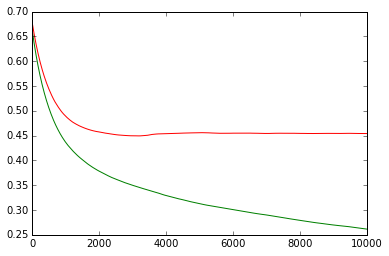

In [26]:
plot_valid_curves(losses_by_lrate, small_learning_rate)